In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential

In [96]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [126]:
X = df.drop('Type', axis=1)
y = df['Type']

# 3. Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train_encoded = to_categorical(y_train - 1)
y_test_encoded = to_categorical(y_test - 1)

In [127]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

C:\Users\oneey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3378 - loss: 1.8459 - val_accuracy: 0.4286 - val_loss: 1.6948
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 1.7847 - val_accuracy: 0.4857 - val_loss: 1.6573
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5363 - loss: 1.7362 - val_accuracy: 0.4571 - val_loss: 1.6206
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4960 - loss: 1.6647 - val_accuracy: 0.4286 - val_loss: 1.5820
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 1.6495 - val_accuracy: 0.4286 - val_loss: 1.5414
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 1.6100 - val_accuracy: 0.4571 - val_loss: 1.5031
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5163 - loss: 1.5870 - val_accuracy: 0.4571 - val_loss: 1.4646
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4336 - loss: 1.5296 - val_accuracy: 0.4571 - val_loss:

In [130]:
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 72.09%


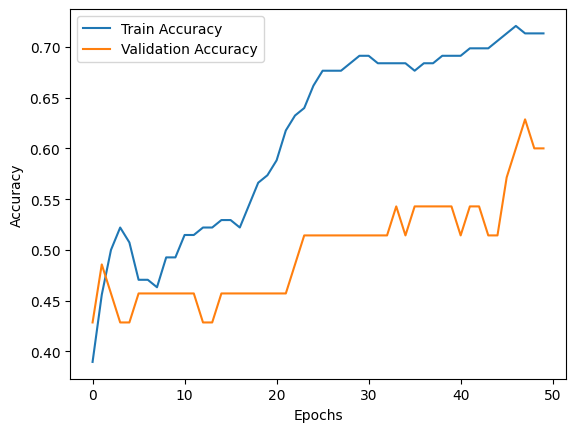

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

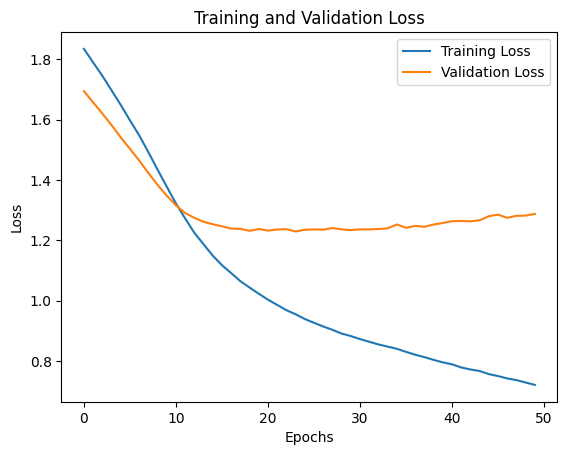

In [132]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Lab1 report
              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.77      0.67      0.71        15
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.85      0.66      0.72        43
weighted avg       0.78      0.74      0.74        43

In [149]:
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [150]:
train_path = "Vegetable Images/train"
validation_path = "Vegetable Images/validation"
test_path = "Vegetable Images/test"

In [151]:
image_categories = os.listdir('Vegetable Images/train')

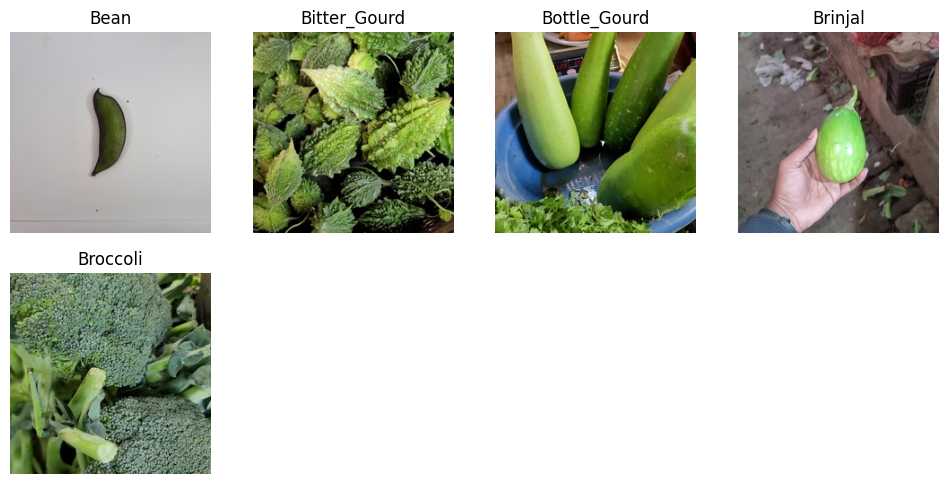

In [152]:
def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

In [153]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 5000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [156]:
model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251,525 (42.92 MB)

 Trainable params: 11,251,525 (42.92 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_image_generator, validation_data=val_image_generator, epochs=10, batch_size=32)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.4602 - loss: 1.4159 - val_accuracy: 0.8620 - val_loss: 0.3955
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.8829 - loss: 0.3522 - val_accuracy: 0.9350 - val_loss: 0.1921
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9470 - loss: 0.1417 - val_accuracy: 0.9520 - val_loss: 0.1272
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.9663 - loss: 0.0980 - val_accuracy: 0.9580 - val_loss: 0.1208
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9780 - loss: 0.0656 - val_accuracy: 0.9700 - val_loss: 0.0873
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9855 - loss: 0.0449 - val_accuracy: 0.9490 - val_loss: 0.1684
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9869 - loss: 0.0476 - val_accuracy: 0.9610 - val_loss: 0.1265
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9829 - loss: 0

In [158]:
from tensorflow.keras.applications import VGG16

In [160]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False
model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [162]:
hist_transfer = model_transfer.fit(train_image_generator, validation_data=val_image_generator, epochs=10, batch_size=32)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 102s 646ms/step - accuracy: 0.7986 - loss: 0.6595 - val_accuracy: 0.9860 - val_loss: 0.0499
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 99s 633ms/step - accuracy: 0.9870 - loss: 0.0445 - val_accuracy: 0.9890 - val_loss: 0.0363
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 636ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.9920 - val_loss: 0.0200
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 99s 633ms/step - accuracy: 0.9941 - loss: 0.0149 - val_accuracy: 0.9930 - val_loss: 0.0187
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 636ms/step - accuracy: 0.9996 - loss: 0.0047 - val_accuracy: 0.9900 - val_loss: 0.0393
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 98s 626ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9890 - val_loss: 0.0459
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 99s 633ms/step - accuracy: 0.9951 - loss: 0.0094 - val_accuracy: 0.9950 - val_loss: 0.0221
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 635ms/step - accuracy: 0.9949 - los

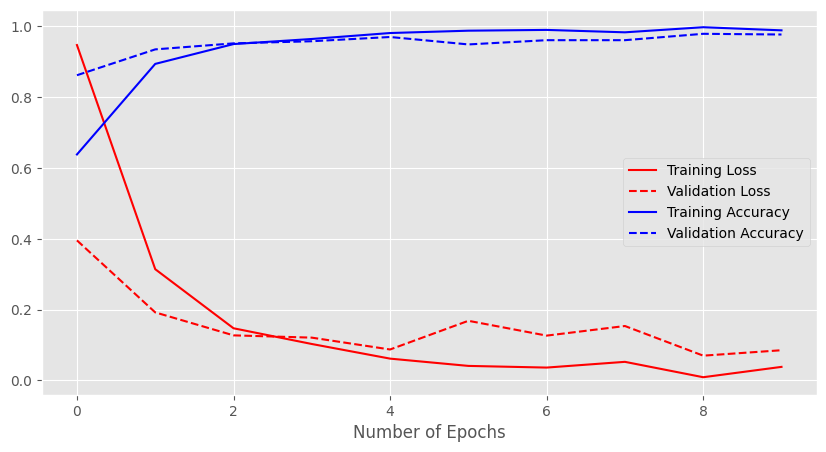

In [163]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

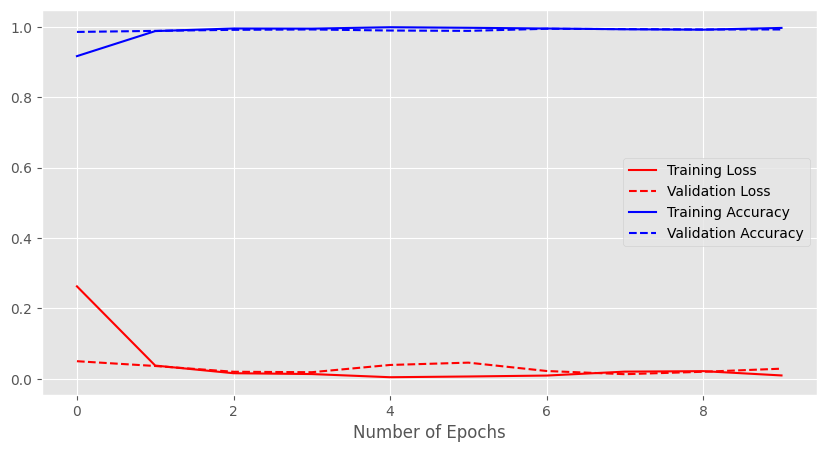

In [164]:
h = hist_transfer.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [171]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [172]:
def parse_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, text = line.split(' ', 1)
            title, text = text.split(': ', 1)
            label = int(label.replace('__label__', ''))
            data.append((title.strip(), text.strip(), label))
    return pd.DataFrame(data, columns=['title', 'text', 'label'])

In [190]:
df_train = parse_data('train.ft.txt')
df_test = parse_data('test.ft.txt')
df = pd.concat([df_train, df_test])
df['label'] = df['label'] - 1
df_sampled = df.sample(frac=0.025, random_state=42)
X = df_sampled['text'].values
y = df_sampled['label'].values

In [192]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad the sequences
X_padded = pad_sequences(X_sequences, maxlen=100, padding='post', truncating='post')

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# 4. Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

In [193]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 218s 87ms/step - accuracy: 0.5549 - loss: 0.6819 - val_accuracy: 0.6171 - val_loss: 0.6611
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 213s 85ms/step - accuracy: 0.7656 - loss: 0.4968 - val_accuracy: 0.8738 - val_loss: 0.3035
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 217s 87ms/step - accuracy: 0.8910 - loss: 0.2738 - val_accuracy: 0.8861 - val_loss: 0.2830
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 211s 85ms/step - accuracy: 0.9089 - loss: 0.2301 - val_accuracy: 0.8880 - val_loss: 0.2738
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 213s 85ms/step - accuracy: 0.9233 - loss: 0.1978 - val_accuracy: 0.8824 - val_loss: 0.2970
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8818 - loss: 0.3018
Test Accuracy: 88.24%


In [196]:
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file, encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [202]:
embedding_dim = 100
hits = 0
misses = 0

embedding_matrix = np.zeros((5000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 4921 words (78 misses)


In [205]:
model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=embedding_dim,
                    weights=[embedding_matrix], input_length=100, trainable=False))

model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

In [206]:
pretrained = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5, batch_size=32)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 146s 58ms/step - accuracy: 0.5590 - loss: 0.6804 - val_accuracy: 0.7416 - val_loss: 0.5842
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.7370 - loss: 0.5420 - val_accuracy: 0.8015 - val_loss: 0.4269
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 153s 61ms/step - accuracy: 0.8226 - loss: 0.3996 - val_accuracy: 0.8403 - val_loss: 0.3658
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 152s 61ms/step - accuracy: 0.8425 - loss: 0.3607 - val_accuracy: 0.8529 - val_loss: 0.3393
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 150s 60ms/step - accuracy: 0.8556 - loss: 0.3321 - val_accuracy: 0.8600 - val_loss: 0.3229
